# Linking GitHub Datasets

In [1]:
!git clone https://github.com/picklesueat/data_jobs_data.git

Cloning into 'data_jobs_data'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 85 (delta 41), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 14.09 MiB | 3.85 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Updating files: 100% (7/7), done.


In [2]:
!ls data_jobs_data/data

BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


In [3]:
%cd "data_jobs_data/data"
!ls

/content/data_jobs_data/data
BusinessAnalyst.csv  DataAnalyst.csv  DataEngineer.csv	DataScientist.csv


# Loading the Dataset

In [4]:
import pandas as pd

BusinessAnalyst= pd.read_csv("BusinessAnalyst.csv")
BusinessAnalyst.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [5]:
BusinessAnalyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


# Data Cleaning

In [6]:
# Select only the columns you want into a new dataframe
BusinessAnalyst_df = BusinessAnalyst[["Job Title", "Job Description", "Company Name", "Location", "Industry", "Sector","Rating"]].copy()

In [7]:
BusinessAnalyst_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Business Analyst - Clinical & Logistics Platform,Company Overview\n\n\nAt Memorial Sloan Ketter...,Memorial Sloan-Kettering\n3.9,"New York, NY",Health Care Services & Hospitals,Health Care,3.9
1,Business Analyst,We are seeking for an energetic and collaborat...,Paine Schwartz Partners\n3.8,"New York, NY",Venture Capital & Private Equity,Finance,3.8
2,Data Analyst,"For more than a decade, Asembia has been worki...",Asembia\n3.6,"Florham Park, NJ",Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,3.6
3,"Information Security Analyst, Incident Response",Job Description Summary\nThe Information Secur...,BD\n3.6,"Franklin Lakes, NJ",Health Care Products Manufacturing,Manufacturing,3.6
4,Analyst - FP&A Global Revenue,Magnite is the world's largest independent sel...,Rubicon Project\n3.4,"New York, NY",Internet,Information Technology,3.4


## Checking for the unique values

In [8]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    print(f"{col}: {BusinessAnalyst[col].nunique()} unique values")

Job Title: 2210 unique values
Company Name: 2197 unique values
Location: 218 unique values
Industry: 110 unique values
Sector: 63 unique values


## Removing NULL rows

In [9]:
BusinessAnalyst_df.dropna(subset=["Job Title", "Company Name", "Location"], inplace=True)

## Converting values into string-removing extra spaces

In [10]:
for col in ["Job Title", "Company Name", "Location", "Industry", "Sector"]:
    BusinessAnalyst_df[col] = BusinessAnalyst_df[col].astype(str).str.strip()

## Normalize whitespace in job description

In [11]:
BusinessAnalyst_df["Job Description"] = BusinessAnalyst_df["Job Description"].str.replace(r"\s+", " ", regex=True).str.strip()
BusinessAnalyst_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Business Analyst - Clinical & Logistics Platform,Company Overview At Memorial Sloan Kettering (...,Memorial Sloan-Kettering\n3.9,"New York, NY",Health Care Services & Hospitals,Health Care,3.9
1,Business Analyst,We are seeking for an energetic and collaborat...,Paine Schwartz Partners\n3.8,"New York, NY",Venture Capital & Private Equity,Finance,3.8
2,Data Analyst,"For more than a decade, Asembia has been worki...",Asembia\n3.6,"Florham Park, NJ",Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,3.6
3,"Information Security Analyst, Incident Response",Job Description Summary The Information Securi...,BD\n3.6,"Franklin Lakes, NJ",Health Care Products Manufacturing,Manufacturing,3.6
4,Analyst - FP&A Global Revenue,Magnite is the world's largest independent sel...,Rubicon Project\n3.4,"New York, NY",Internet,Information Technology,3.4


## Cleaning the company format

In [12]:
BusinessAnalyst_df["Company Name"] = BusinessAnalyst_df["Company Name"].str.replace(r"\n\d+(\.\d+)?", "", regex=True).str.strip()
BusinessAnalyst_df.head()

,Job Title,Job Description,Company Name,Location,Industry,Sector,Rating
0,Business Analyst - Clinical & Logistics Platform,Company Overview At Memorial Sloan Kettering (...,Memorial Sloan-Kettering,"New York, NY",Health Care Services & Hospitals,Health Care,3.9
1,Business Analyst,We are seeking for an energetic and collaborat...,Paine Schwartz Partners,"New York, NY",Venture Capital & Private Equity,Finance,3.8
2,Data Analyst,"For more than a decade, Asembia has been worki...",Asembia,"Florham Park, NJ",Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,3.6
3,"Information Security Analyst, Incident Response",Job Description Summary The Information Securi...,BD,"Franklin Lakes, NJ",Health Care Products Manufacturing,Manufacturing,3.6
4,Analyst - FP&A Global Revenue,Magnite is the world's largest independent sel...,Rubicon Project,"New York, NY",Internet,Information Technology,3.4


## Checking unique values in the Dataset

In [13]:
for col in ["Company Name", "Location", "Industry", "Sector"]:
    print(f"\nUnique values in '{col}':")
    print(BusinessAnalyst_df[col].unique())


Unique values in 'Company Name':
['Memorial Sloan-Kettering' 'Paine Schwartz Partners' 'Asembia' ...
 'Toronto, Canada' 'Sterling, VA' 'Frederick, MD']

Unique values in 'Location':
['New York, NY' 'Florham Park, NJ' 'Franklin Lakes, NJ' 'Lyndhurst, NJ'
 'Jersey City, NJ' 'Newark, NJ' 'Brooklyn, NY' 'Hackensack, NJ'
 'Iselin, NJ' 'Whippany, NJ' 'Hoboken, NJ' 'Weehawken, NJ' 'Moonachie, NJ'
 'Teaneck, NJ' 'Rego Park, NY' 'Paramus, NJ' 'Livingston, NJ'
 'Secaucus, NJ' 'South Plainfield, NJ' 'Madison, NJ' 'Ridgefield Park, NJ'
 'Harrison, NJ' 'Lake Hiawatha, NJ' 'Woodbridge, NJ' 'Union, NJ'
 'Summit, NJ' 'Rutherford, NJ' 'Matawan, NJ' 'Wilmington, CA'
 'Los Angeles, CA' 'Santa Monica, CA' 'El Segundo, CA' 'Glendale, CA'
 'Long Beach, CA' 'Commerce, CA' 'Hollywood, CA' 'West Covina, CA'
 'Inglewood, CA' 'Calabasas, CA' 'Anaheim, CA' 'Brea, CA'
 'Marina del Rey, CA' 'Burbank, CA' 'Rosemead, CA' 'Cerritos, CA'
 'Pasadena, CA' 'Torrance, CA' 'Westminster, CA' 'El Monte, CA'
 'Monterey Park, 

## Data Viz-Top Job titles

/tmp/ipython-input-2423975350.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")


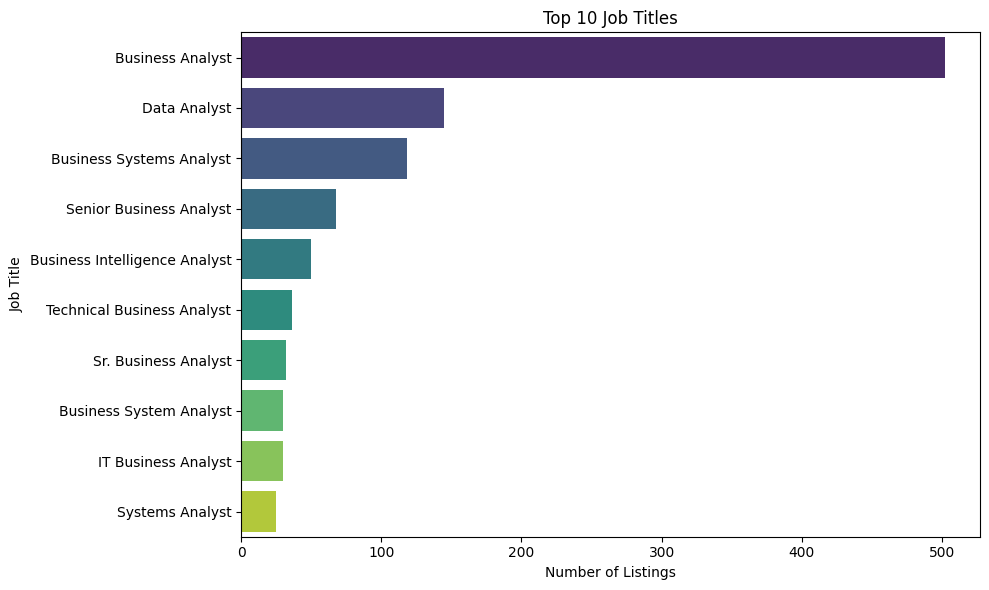

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

top_job_titles = BusinessAnalyst_df["Job Title"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# Cleaning the dataset

In [15]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the directory path
save_dir = '/content/drive/My Drive/CleanDatasets'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the dataframe to the specified directory
BusinessAnalyst_df.to_csv(f'{save_dir}/cleaned_BusinessAnalyst.csv', index=False)
print(f"Cleaned dataset saved to Google Drive in '{save_dir}'.")

Mounted at /content/drive
Cleaned dataset saved to Google Drive in '/content/drive/My Drive/CleanDatasets'.
